<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%E1%84%91%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A9%E1%84%8E%E1%85%B5%EB%A1%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%8B%A4%EB%A3%A8%EA%B8%B0_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%89%E1%85%A6%E1%86%BA_%E1%84%85%E1%85%A9%E1%84%83%E1%85%A5%EC%99%80_%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%AF%E1%86%AB%E1%84%92%E1%85%A1%E1%86%BA%EC%9D%B8%EC%BD%94%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17087809.13it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 344168.17it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6173157.33it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13336798.64it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
training_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

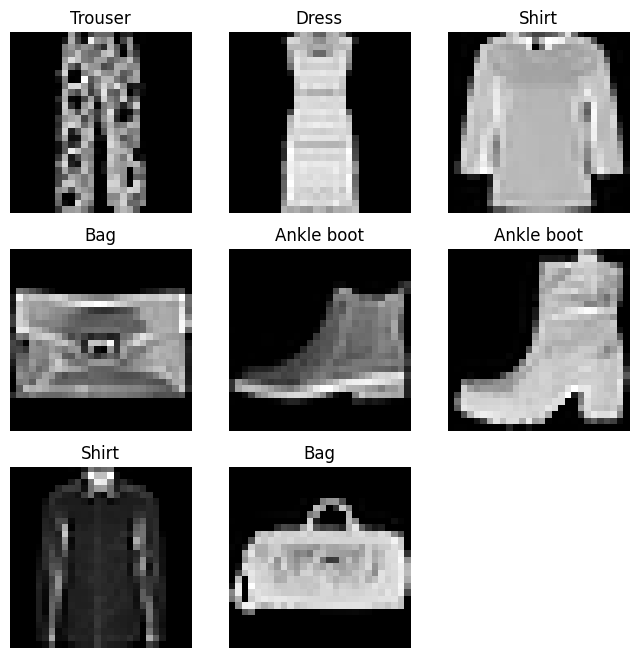

In [7]:
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows * 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
import os  # 운영 체제와 상호 작용하기 위한 모듈을 가져옵니다. 이 모듈은 파일 경로를 조작하는 데 사용됩니다.
import pandas as pd  # 데이터 분석 및 조작을 위한 라이브러리인 판다스를 가져옵니다. 이 라이브러리는 CSV 파일을 읽는 데 사용됩니다.
from torchvision.io import read_image  # PyTorch의 torchvision 라이브러리에서 이미지 읽기 함수를 가져옵니다. 이 함수는 이미지 파일을 읽어서 텐서로 변환합니다.

class CustomImageDataset(Dataset):  # PyTorch의 Dataset 클래스를 상속받는 사용자 정의 클래스를 정의합니다.
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
      # 클래스의 인스턴스를 초기화하는 메서드입니다.
      self.img_labels = pd.read_csv(annotations_file, name=['file_name', 'label'])  # 이미지 파일 이름과 레이블이 있는 CSV 파일을 읽어서 판다스 데이터프레임으로 저장합니다.
      self.img_dir = img_dir  # 이미지가 저장된 디렉토리의 경로를 저장합니다.
      self.transform = transform  # 이미지에 적용할 변환을 저장합니다. 이 변환은 데이터 증강이나 전처리를 위해 사용될 수 있습니다.
      self.target_transform = target_transform  # 레이블에 적용할 변환을 저장합니다. 이 변환은 레이블을 원-핫 인코딩하거나 정수로 변환하는 데 사용될 수 있습니다.

  def __len__(self):
      # 데이터셋의 길이(이미지의 수)를 반환하는 메서드입니다.
      return len(self.img_labels)

  def __getitem__(self, idx):
      # 주어진 인덱스에 해당하는 이미지와 레이블을 반환하는 메서드입니다.
      img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])  # 이미지 파일의 전체 경로를 생성합니다.
      image = read_image(img_path)  # 이미지 파일을 읽어서 텐서로 변환합니다.
      label = self.img_labels.iloc[idx, 1]  # 판다스 데이터프레임에서 해당 인덱스의 레이블을 가져옵니다.
      if self.transform:
        image = self.transform(image)  # 이미지에 변환을 적용합니다.
      if self.target_transform:
        label = self.target_transform(label)  # 레이블에 변환을 적용합니다.
      return image, label  # 변환된 이미지와 레이블을 반환합니다.


In [9]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
      self.img_labels = pd.read_csv(annotations_file)
      self.img_dir = img_dir
      self.transform = transform
      self.target_transform = target_transform

In [10]:
def __len__(self):
    return len(self.img_labels)

In [11]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


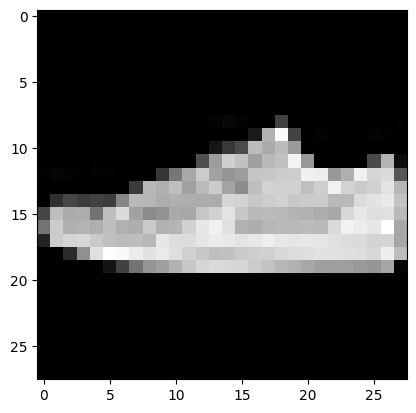

Label: 7


In [14]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#-----------------------------------------------------------------------------------------------

In [16]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: troch.zeros(10, dtype = torch.float).scatter_(0, torch.tensor(y),value=1))
)

In [20]:
torch.tensor([0, 1, 2, 3]).float()

tensor([0., 1., 2., 3.])

In [19]:
torch.FloatTensor([0, 1, 2, 3])

tensor([0., 1., 2., 3.])

In [21]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [23]:
for i in range(1, 6):
  print(target_transform(i))

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
